In [1]:
import numpy as np
import scipy as sc
from scipy.optimize import curve_fit as cf
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def sixth_order(x, a, b, c, d, e, f, g):
    return a * pow(x,6) + b * pow(x,5) + c * pow(x,4) + d* pow(x,3) + e * pow(x,2) + f * pow(x,1) + g

def seventh_order(x, a, b, c, d, e, f, g, h):
    return sixth_order(x, a, b, c, d, e, f, g) * x + h

Current conversion: converted = ((raw / 1024) - 0.2) * 5000


In [17]:
data = pd.read_csv("high_pt_characterization_10_10")

In [18]:
data

,Unnamed: 0,Unnamed: 0.1,digital,converted,raw
0,0,0,700,580,2.311498e+06
1,1,1,730,615,2.362702e+06
2,2,2,0,15,1.484918e+06
3,3,3,150,100,1.609271e+06
4,4,4,805,665,2.435850e+06
5,5,5,890,740,2.545573e+06
6,6,6,990,820,2.662611e+06
7,7,7,1100,910,2.794279e+06
8,8,8,1200,980,2.896687e+06
9,9,9,1351,1120,3.101503e+06


In [19]:
data['ratio'] = ((data[' converted'] / 5000) +  0.2)

In [20]:
data['ratio']

0     0.316
1     0.323
2     0.203
3     0.220
4     0.333
5     0.348
6     0.364
7     0.382
8     0.396
9     0.424
10    0.440
11    0.460
12    0.490
13    0.516
14    0.544
15    0.560
16    0.590
17    0.618
18    0.646
19    0.672
20    0.698
21    0.726
22    0.747
23    0.761
24    0.794
25    0.804
26    0.828
27    0.856
28    0.868
29    0.886
30    0.892
31    0.918
Name: ratio, dtype: float64

In [21]:
data['voltage'] = data['ratio'] * 5

In [22]:
r = 240
vmin = 0.004 * r
vmax = 0.02 * r

raw_min = (vmin / 5) * pow(2,23)
raw_max = (vmax / 5) * pow(2,23)

print("V = [{}, {}]".format(vmin, vmax))
print("raw = [{}, {}]".format(raw_min, raw_max))

V = [0.96, 4.8]
raw = [1610612.736, 8053063.68]


In [24]:
data['raw'] = data['ratio'] * raw_max
data['raw']

0     2.544768e+06
1     2.601140e+06
2     1.634772e+06
3     1.771674e+06
4     2.681670e+06
5     2.802466e+06
6     2.931315e+06
7     3.076270e+06
8     3.189013e+06
9     3.414499e+06
10    3.543348e+06
11    3.704409e+06
12    3.946001e+06
13    4.155381e+06
14    4.380867e+06
15    4.509716e+06
16    4.751308e+06
17    4.976793e+06
18    5.202279e+06
19    5.411659e+06
20    5.621038e+06
21    5.846524e+06
22    6.015639e+06
23    6.128381e+06
24    6.394133e+06
25    6.474663e+06
26    6.667937e+06
27    6.893423e+06
28    6.990059e+06
29    7.135014e+06
30    7.183333e+06
31    7.392712e+06
Name: raw, dtype: float64

In [11]:
print(4514729 / pow(2,23) * 5)
print(((2.69 -1) / 5) * 5000)
print(pow(2,23) / 5)

2.6909881830215454
1689.9999999999998
1677721.6


In [8]:
data.append([32, 5000, -1, raw_max], ignore_index = True)

,0,converted,Unnamed: 0,Unnamed: 0.1,digital,raw
0,NaN,580.0,0.0,0.0,700.0,0.316
1,NaN,615.0,1.0,1.0,730.0,0.323
2,NaN,15.0,2.0,2.0,0.0,0.203
3,NaN,100.0,3.0,3.0,150.0,0.220
4,NaN,665.0,4.0,4.0,805.0,0.333
5,NaN,740.0,5.0,5.0,890.0,0.348
6,NaN,820.0,6.0,6.0,990.0,0.364
7,NaN,910.0,7.0,7.0,1100.0,0.382
8,NaN,980.0,8.0,8.0,1200.0,0.396
9,NaN,1120.0,9.0,9.0,1351.0,0.424


In [25]:
data

,Unnamed: 0,Unnamed: 0.1,digital,converted,raw,ratio,voltage
0,0,0,700,580,2.544768e+06,0.316,1.580
1,1,1,730,615,2.601140e+06,0.323,1.615
2,2,2,0,15,1.634772e+06,0.203,1.015
3,3,3,150,100,1.771674e+06,0.220,1.100
4,4,4,805,665,2.681670e+06,0.333,1.665
5,5,5,890,740,2.802466e+06,0.348,1.740
6,6,6,990,820,2.931315e+06,0.364,1.820
7,7,7,1100,910,3.076270e+06,0.382,1.910
8,8,8,1200,980,3.189013e+06,0.396,1.980
9,9,9,1351,1120,3.414499e+06,0.424,2.120


In [26]:
data.to_csv("high_pt_characterization_10_10")

In [7]:
data.to_csv("high_pt_characterization_10_10")

In [6]:
res, cov = cf(seventh_order, data['raw'], data['digital'])

In [7]:
res

array([ 4.81649341e-16, -2.08701274e-12,  3.74338127e-09, -3.58936995e-06,
        1.97860885e-03, -6.23995436e-01,  1.09627235e+02, -8.18065444e+03])

In [8]:
x = np.linspace(0,5000)
p = sixth_order(x, res[0], res[1], res[2], res[3], res[4], res[5], res[6])

In [9]:
sixth_order(3100, res[0], res[1], res[2], res[3], res[4], res[5], res[6])

85939.40880524958

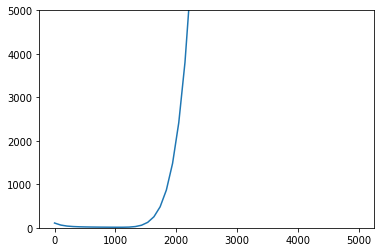

In [10]:
plt.ylim(0, 5000)
plt.plot(x, p)

In [14]:
f = interp1d(data['raw'], data['digital'], kind='quadratic')

In [15]:
f(5094007)

array(3010.75298662)

In [13]:
f(1800)

array(2180.)